# ws 03

In [198]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [199]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1, random_state=1)


In [200]:
X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])

df = pd.concat([X_df, y_df], axis=1)

target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat',4:'dog'}  # 
df['class'] = df['class'].map(target_map)

# df.head()
df.sample(5, random_state=100)

,weight,height,class
249,-11.889046,-3.890515,bird
353,-9.501477,-4.717762,bird
537,-3.277917,1.611778,dog
424,-9.297471,-2.403170,bird
564,-2.897847,0.377424,dog


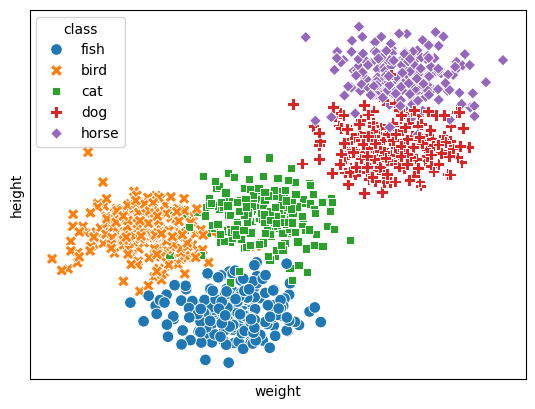

In [201]:
sns.scatterplot(x='weight', y='height', data=df, s=70,
                hue=df['class'], style=df['class'])

plt.xticks([])
plt.yticks([])
plt.show()

In [202]:
class_names, y = np.unique(df['class'], return_inverse=True)
class_names

array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object)

In [203]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063


In [204]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352]])

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((750, 2), (250, 2))

In [206]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(2,)))  

model.add(Dense(5, activation='softmax'))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [207]:
model.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)               │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

In [208]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

In [209]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.25) # no1

Epoch 1/50


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1319 - loss: 1.5789 - val_accuracy: 0.5106 - val_loss: 1.3979
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5750 - loss: 1.3558 - val_accuracy: 0.7181 - val_loss: 1.2106
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7116 - loss: 1.1648 - val_accuracy: 0.7181 - val_loss: 1.0573
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7144 - loss: 1.0230 - val_accuracy: 0.7128 - val_loss: 0.9340
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7171 - loss: 0.9018 - val_accuracy: 0.7287 - val_loss: 0.8364
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7543 - loss: 0.7960 - val_accuracy: 0.7447 - val_loss: 0.7585
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7774 - loss: 0.7074 - val_accuracy: 0.7872 - val_loss: 0.6914
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.6692 - val_accuracy: 0.7979 - val_loss: 0.6364
Ep

In [210]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.11768237501382828
Test accuracy: 0.9679999947547913


In [211]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.   , 0.   , 0.008, 0.   , 0.992],
       [0.   , 0.   , 0.02 , 0.   , 0.98 ],
       [0.   , 0.027, 0.936, 0.   , 0.036],
       [0.003, 0.89 , 0.009, 0.099, 0.   ]], dtype=float32)

In [212]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

array([4, 4, 2, 1], dtype=int64)

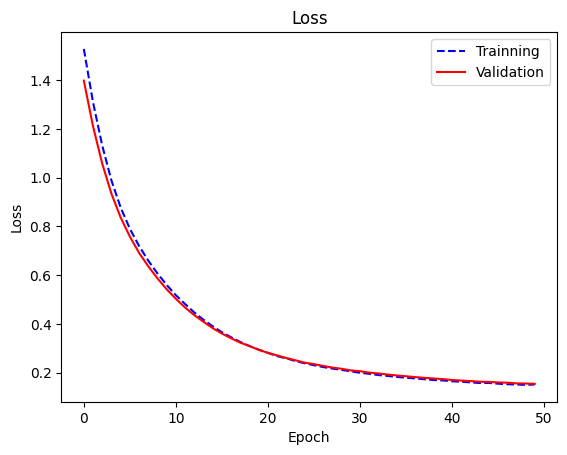

In [213]:
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.legend()
plt.title('Loss')

plt.show()

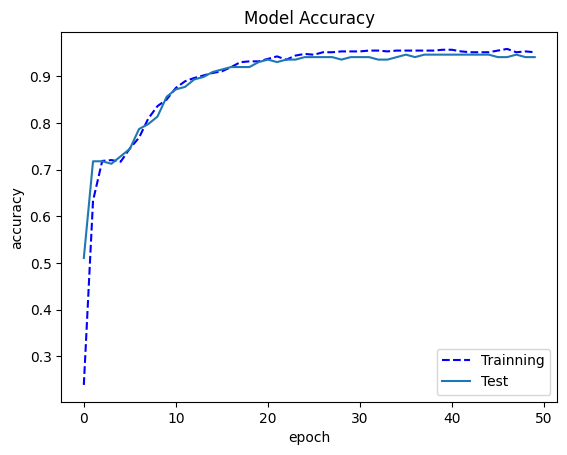

In [214]:
df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [215]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)    

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 514us/step


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


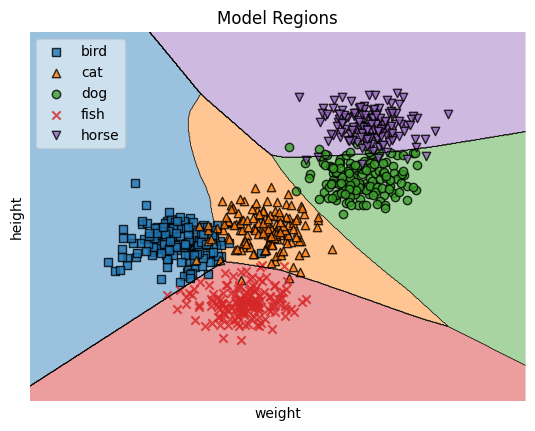

In [216]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X_train, y_train, clf=model_no_ohe,
                          zoom_factor=1.)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Model Regions') 
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

# ws 08

In [399]:
model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(2,)))  

model.add(Dense(5, activation='softmax'))

In [400]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
             metrics=['accuracy'])

In [401]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 1.6760528087615967
Test accuracy 0.13333334028720856


In [402]:
import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=opt, 
             metrics=['accuracy'])

In [403]:
history = model.fit(X_train, y_train, epochs = 20, batch_size=20, verbose = 0, validation_split=0.25)

In [404]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', 
             metrics=['accuracy'])

In [405]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.4791378676891327
Test accuracy 0.8533333539962769


# ws 09

In [406]:
X, y = make_blobs(n_samples=300, centers=5, n_features=2, cluster_std=1.5, random_state=1)

X_df = pd.DataFrame(X, columns=['weight','height'])
y_df = pd.DataFrame(y, columns=['class'])

df = pd.concat([X_df, y_df], axis=1)

target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat',4:'dog'}  # 
df['class'] = df['class'].map(target_map)

# df.head()
df.sample(5, random_state=100)

,weight,height,class
222,0.251074,7.357142,horse
139,-6.137073,-8.817986,fish
216,-2.910334,0.910864,dog
201,-10.462888,-7.605605,bird
249,-4.083457,-2.200076,cat


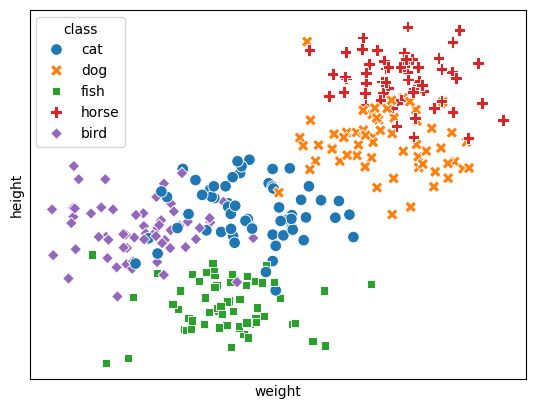

In [407]:
sns.scatterplot(x='weight', y='height', data=df, s=70,
                hue=df['class'], style=df['class'])

plt.xticks([])
plt.yticks([])
plt.show()

In [408]:
class_names, y = np.unique(df['class'], return_inverse=True)
class_names

array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object)

In [409]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-3.068054,-4.267086
1,-4.162870,0.898986
2,-7.044853,-9.195268
3,-2.061392,5.202023
4,-11.676386,-1.019230


In [410]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[ 0.66719181, -0.52421112],
       [ 0.3478834 ,  0.60685471],
       [-0.49266104, -1.60319287],
       [ 0.96078956,  1.54896643]])

In [411]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((225, 2), (75, 2))

In [412]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(2,)))   # 
model.add(Dense(128, activation='relu'))  # 
model.add(Dense(64, activation='relu'))  # 

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 1000, batch_size=256, verbose = 0, validation_data=(X_test, y_test))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [413]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 1.252797245979309
Test accuracy 0.8533333539962769


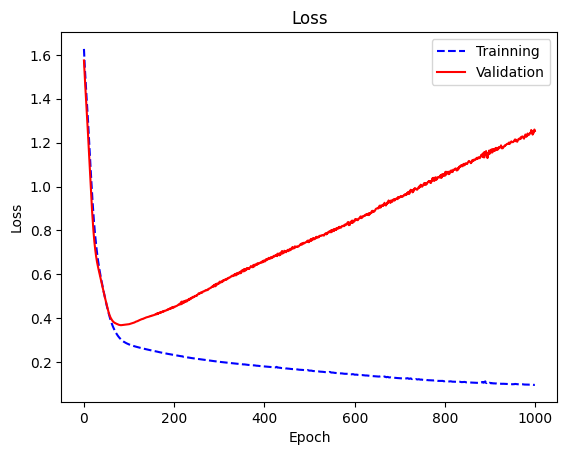

In [414]:
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.legend()
plt.title('Loss')

plt.show()

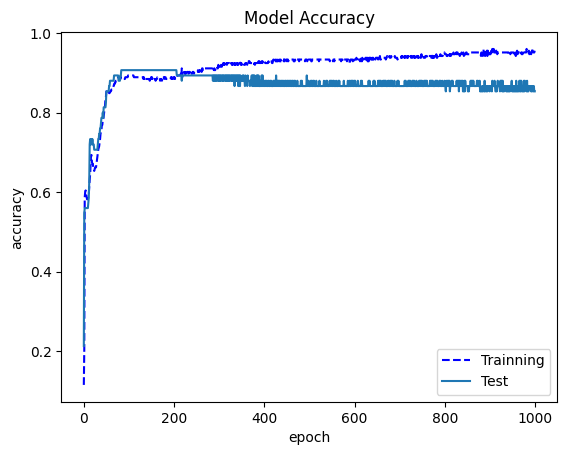

In [415]:
df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [416]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)    

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


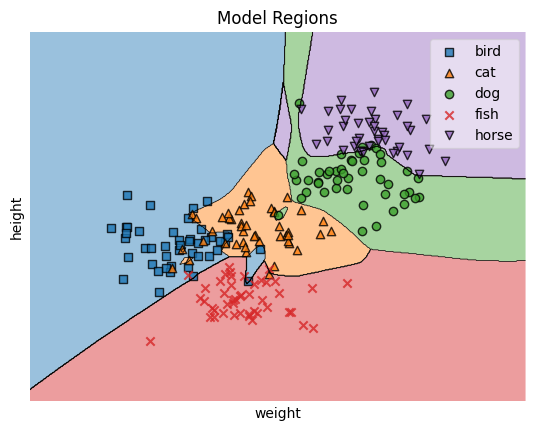

In [417]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X_train, y_train, clf=model_no_ohe,
                          zoom_factor=1.)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Model Regions') 
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

# ws 10

In [418]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

model = Sequential()

model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001), input_shape=(2,)))  
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))  # 
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))  # 

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 1000, batch_size=256, verbose = 0, validation_data=(X_test, y_test))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [419]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.576882004737854
Test accuracy 0.8933333158493042


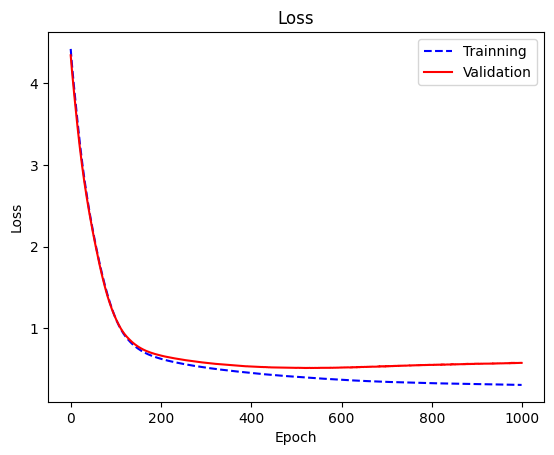

In [420]:
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.legend()
plt.title('Loss')

plt.show()

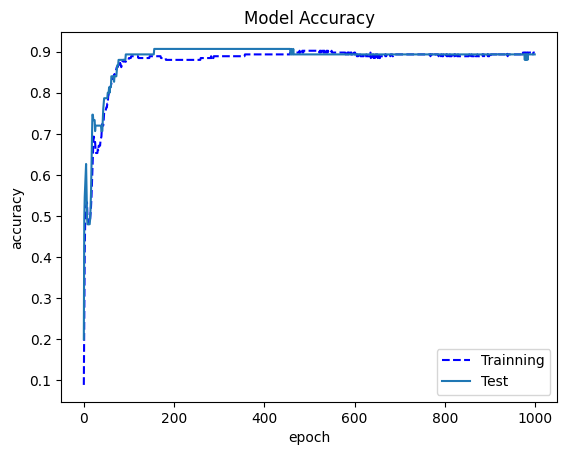

In [421]:
df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [422]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)   

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 727us/step


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


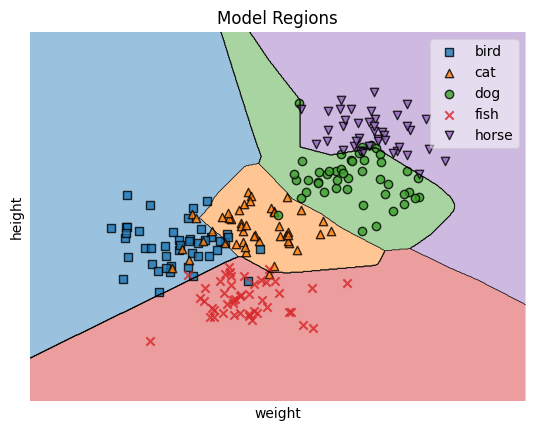

In [423]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X_train, y_train, clf=model_no_ohe,
                          zoom_factor=1.)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Model Regions') 
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

# ws 11

In [424]:
model = Sequential()

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))  
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 1000, batch_size=256, verbose = 0, validation_data=(X_test, y_test))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [425]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.4787980020046234
Test accuracy 0.9066666960716248


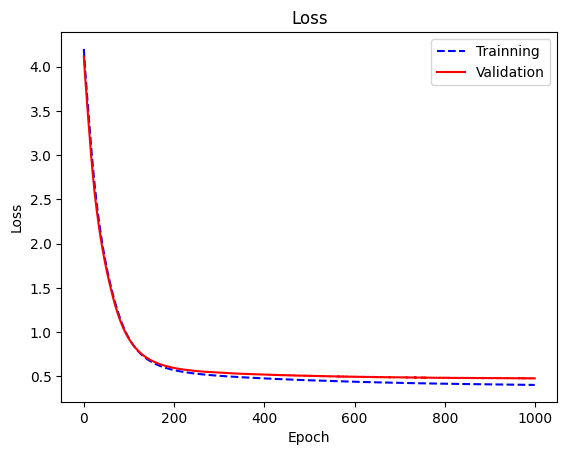

In [426]:
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.legend()
plt.title('Loss')

plt.show()

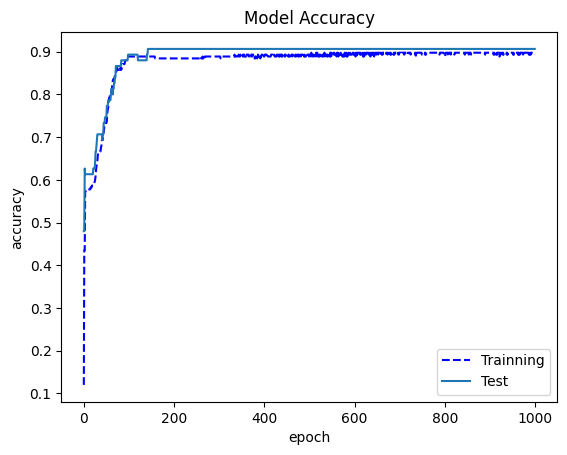

In [427]:
df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

# ws 12

In [431]:
model = Sequential()

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))  #.001
model.add(Dropout(.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  #
model.add(Dropout(.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # 
model.add(Dropout(.4))

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 1000, batch_size=256, verbose = 0, validation_data=(X_test, y_test))

In [432]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.5300831198692322
Test accuracy 0.9066666960716248


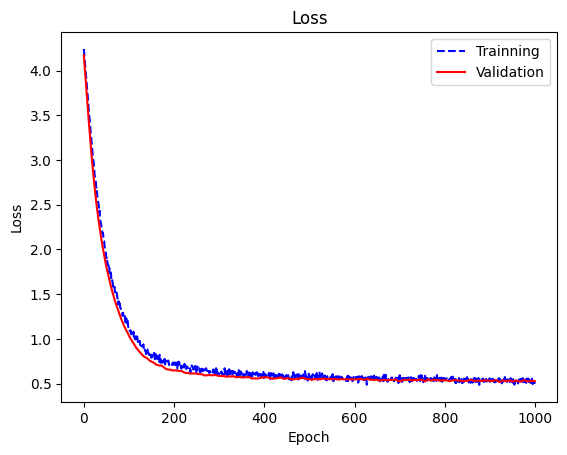

In [433]:
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.legend()
plt.title('Loss')

plt.show()

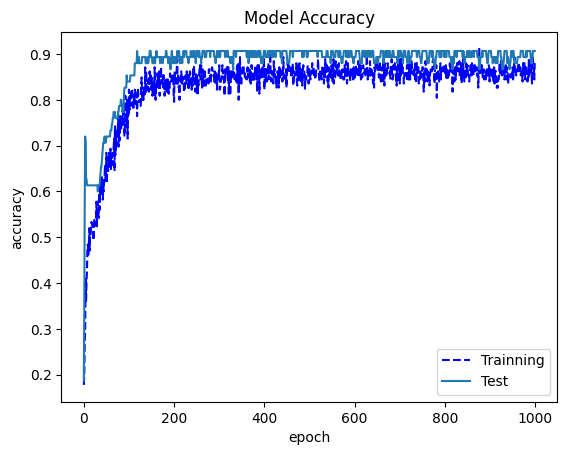

In [434]:
df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

# ws 13

In [440]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', verbose=1, patience=20) # 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(2,)))   # 
model.add(Dense(128, activation='relu'))  # 
model.add(Dense(64, activation='relu'))  # 

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), 
                    epochs=1000, verbose=0, callbacks=[es])

Epoch 101: early stopping


In [441]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Train: {:.3f}, Test: {:.3f}'.format(train_score[1], test_score[1]))

Train: 0.889, Test: 0.907


In [442]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.3725331425666809
Test accuracy 0.9066666960716248


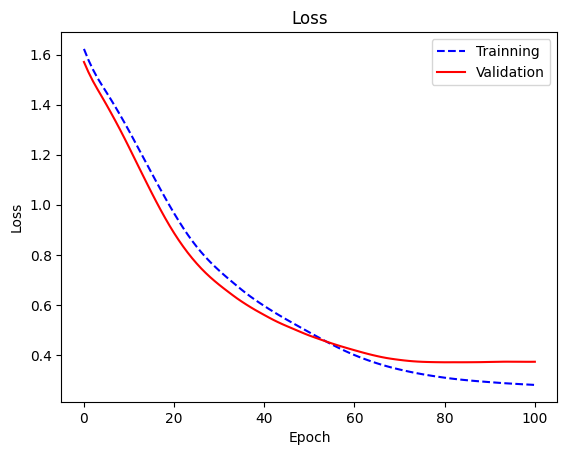

In [443]:
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.legend()
plt.title('Loss')

plt.show()

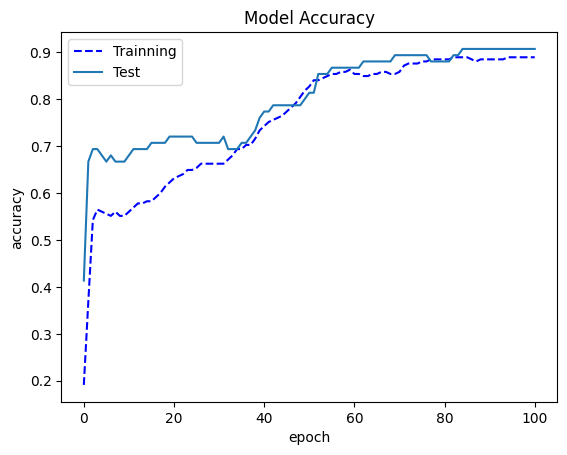

In [444]:
df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

# ws14

In [450]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


es = EarlyStopping(monitor='val_loss', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True) # mode='auto'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()


model.add(Dense(256, activation='relu', input_shape=(2,))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))  

model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), epochs=1000, verbose=0, callbacks=[es,mc])

Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_382 (Dense)               │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_383 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_384 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_385 (Dense)               │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,245 (165.02 KB)

 Trainable params: 42,245 (165.02 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1: val_accuracy improved from -inf to 0.22667, saving model to best_model.keras

Epoch 2: val_accuracy improved from 0.22667 to 0.49333, saving model to best_model.keras

Epoch 3: val_accuracy improved from 0.49333 to 0.66667, saving model to best_model.keras

Epoch 4: val_accuracy improved from 0.66667 to 0.73333, saving model to best_model.keras

Epoch 5: val_accuracy did not improve from 0.73333

Epoch 6: val_accuracy improved from 0.73333 to 0.74667, saving model to best_model.keras

Epoch 7: val_accuracy did not improve from 0.74667

Epoch 8: val_accuracy did not improve from 0.74667

Epoch 9: val_accuracy did not improve from 0.74667

Epoch 10: val_accuracy did not improve from 0.74667

Epoch 11: val_accuracy did not improve from 0.74667

Epoch 12: val_accuracy did not improve from 0.74667

Epoch 13: val_accuracy did not improve from 0.74667

Epoch 14: val_accuracy did not improve from 0.74667

Epoch 15: val_accuracy did not improve from 0.74667

Epoch 16: val_accuracy did